In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [2]:
%cd CD2/CNN

/content/gdrive/MyDrive/CD2/CNN


In [3]:
import keras
import numpy as np

import tensorflow as tf
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from    keras.losses import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
epochs =10



In [4]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(512, 512, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (5, 5), activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5), activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (5, 5), activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    '''model.add(Dense(1024, activation='relu', name='fc1'))
    model.add(Dropout(0.2))'''
    model.add(Dense(120, activation='relu',name='fc1'))
    model.add(Dropout(0.2))
    model.add(Dense(84, activation='relu',name='fc2'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2, beta_1=0.9, beta_2=0.999),

                  metrics=['accuracy'])
    return model

In [5]:
def load_data():
    file = open('pix.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

In [6]:
X, y = load_data()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape)
print(Y_train.shape)

model = get_model()
filepath="weights_{epoch:02d}_{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

aug = ImageDataGenerator()


(4200, 512, 512, 1)
(4200, 1)
(3360, 512, 512, 1)
(3360, 1)


In [7]:
model_hist = model.fit_generator(aug.flow(X_train, Y_train, batch_size=32),
                               epochs=epochs,
                               validation_data=aug.flow(X_test,Y_test,
                               batch_size=32),
                               callbacks=callbacks_list)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


105/105 [==============================] - ETA: 0s - loss: 553.3173 - accuracy: 0.8116
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to weights_01_0.83.hdf5
105/105 [==============================] - 77s 589ms/step - loss: 553.3173 - accuracy: 0.8116 - val_loss: 0.3422 - val_accuracy: 0.8333
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.4410 - accuracy: 0.8339
Epoch 2: val_accuracy improved from 0.83333 to 0.83810, saving model to weights_02_0.84.hdf5
105/105 [==============================] - 40s 377ms/step - loss: 0.4410 - accuracy: 0.8339 - val_loss: 0.3394 - val_accuracy: 0.8381
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.3964 - accuracy: 0.8357
Epoch 3: val_accuracy did not improve from 0.83810
105/105 [==============================] - 35s 335ms/step - loss: 0.3964 - accuracy: 0.8357 - val_loss: 0.4460 - val_accuracy: 0.8310
Epoch 4/10
105/105 [==============================] - ETA: 0s - loss: 0.3658 - accu

In [8]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[acc]) + 1), len(model_history.history[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    plt.savefig('roc.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


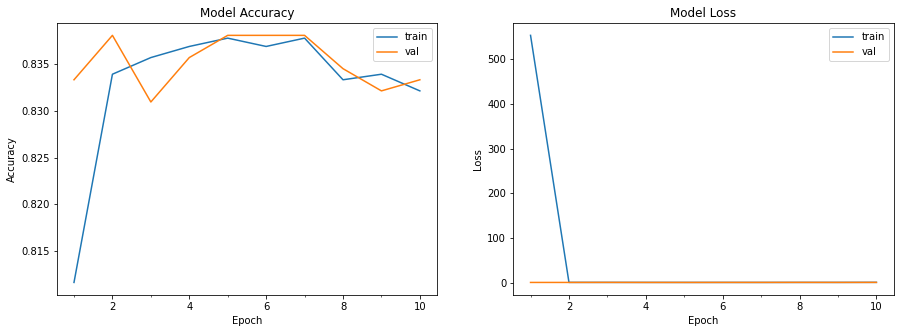

<Figure size 432x288 with 0 Axes>

In [9]:
plot_model_history(model_history=model_hist)

In [35]:
model.save("modelsaved_5_07.h5")

In [21]:
import cv2
from keras import models

In [36]:
model = models.load_model("modelsaved_5_07.h5")

In [43]:
'''load hình và test'''
n=cv2.imread("/content/gdrive/MyDrive/CD2/CNN/Tuberculosis-3.png")
p= cv2.imread("/content/gdrive/MyDrive/CD2/CNN/nwone.png")
n = cv2.resize(n, dsize=(512, 512))
p = cv2.resize(p, dsize=(512, 512))
n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
p = cv2.cvtColor(p, cv2.COLOR_BGR2GRAY)
nx = cv2.Sobel(src=n, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3, scale=1, delta=0)
ny = cv2.Sobel(src=n, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3, scale=1, delta=0)
nx = cv2.convertScaleAbs(nx)
ny = cv2.convertScaleAbs(ny)
n = cv2.addWeighted(nx, 0.5, ny, 0.5, 0)

px = cv2.Sobel(src=p, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3, scale=1, delta=0)
py = cv2.Sobel(src=p, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3, scale=1, delta=0)
px = cv2.convertScaleAbs(px)
py = cv2.convertScaleAbs(py)
p = cv2.addWeighted(px, 0.5, py, 0.5, 0)


In [44]:
'''test 2 hình'''
n_predict = model.predict(n.reshape(1, 512, 512, 1 ))
print(n_predict)
p_predict = model.predict(p.reshape(1, 512, 512, 1 ))
print(p_predict)

[[0.16368221]]
[[1.7247762e-30]]
